# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [27]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [28]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [29]:
print(iris.keys())
print(iris['filename'])
print(iris.data[:10])
print(type(iris.data))
print(iris.target)
print(iris.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [30]:
# we only take the first two features. 
X = iris.data[:,:2]
print(X.shape)
Y = iris.target
print(Y.shape)

(150, 2)
(150,)


In [31]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [32]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [33]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'], columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [34]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x,y],axis=1)
iris_data = iris_data[['sepal width (cm)','petal length (cm)','target']]
iris_data.head(10)

,sepal width (cm),petal length (cm),target
0,3.5,1.4,0
1,3.0,1.4,0
2,3.2,1.3,0
3,3.1,1.5,0
4,3.6,1.4,0
5,3.9,1.7,0
6,3.4,1.4,0
7,3.4,1.5,0
8,2.9,1.4,0
9,3.1,1.5,0


In [35]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data

,sepal width (cm),petal length (cm),target
0,3.5,1.4,0
1,3.0,1.4,0
2,3.2,1.3,0
3,3.1,1.5,0
4,3.6,1.4,0
...,...,...,...
95,3.0,4.2,1
96,2.9,4.2,1
97,2.9,4.3,1
98,2.5,3.0,1


## 切分訓練集與測試集
> train_test_split()

In [36]:
from sklearn.model_selection import train_test_split
print(iris_data)
X_train,X_test,Y_train,Y_test = train_test_split(iris_data[['sepal width (cm)','petal length (cm)']],iris_data['target'],test_size=0.3)
X_train.head()

    sepal width (cm)  petal length (cm)  target
0                3.5                1.4       0
1                3.0                1.4       0
2                3.2                1.3       0
3                3.1                1.5       0
4                3.6                1.4       0
..               ...                ...     ...
95               3.0                4.2       1
96               2.9                4.2       1
97               2.9                4.3       1
98               2.5                3.0       1
99               2.8                4.1       1

[100 rows x 3 columns]


,sepal width (cm),petal length (cm)
83,2.7,5.1
61,3.0,4.2
59,2.7,3.9
16,3.9,1.3
97,2.9,4.3


In [37]:
X_train.head()
X_train.shape

(70, 2)

In [38]:
X_test.head()
X_test.shape

(30, 2)

In [39]:
Y_train.head()
Y_train.shape

(70,)

In [40]:
Y_test.head()
Y_test.shape

(30,)

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [43]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [47]:

print(iris_data)
stats = norm_stats(X_train)
print("============================================")
print(X_train)
print("============================================")
print(stats)
arr_x_train = np.array(z_score(X_train, stats))
arr_y_train = np.array(y_train)
arr_x_train[:5]


    sepal width (cm)  petal length (cm)  target
0                3.5                1.4       0
1                3.0                1.4       0
2                3.2                1.3       0
3                3.1                1.5       0
4                3.6                1.4       0
..               ...                ...     ...
95               3.0                4.2       1
96               2.9                4.2       1
97               2.9                4.3       1
98               2.5                3.0       1
99               2.8                4.1       1

[100 rows x 3 columns]
    sepal width (cm)  petal length (cm)
83               2.7                5.1
61               3.0                4.2
59               2.7                3.9
16               3.9                1.3
97               2.9                4.3
..               ...                ...
63               2.9                4.7
35               3.2                1.2
93               2.3                3.3


C:\Users\bing\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


IndexError: invalid index to scalar variable.

## use sklearn

In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[3.08571429 2.90714286]
[0.47517988 1.45222208]


In [111]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[ 0.66140367, -0.96895845],
       [-1.65350916,  1.0279813 ],
       [-1.23261592,  1.37228125],
       [-0.39082944,  0.95912131],
       [-0.81172268,  0.68368134]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [112]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[-0.18038282 -1.03781844]
 [ 0.66140367  1.09684129]
 [ 0.24051042  1.09684129]
 [-1.65350916  0.27052139]
 [-1.86395578  1.09684129]
 [-0.18038282 -1.24439841]
 [-0.18038282 -0.90009846]
 [ 0.87185029 -1.10667843]
 [-1.23261592  0.68368134]
 [-0.60127606  0.75254133]]


you can also use fit_transform method (i.e., fit and then transform)    

In [113]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[-0.27219535 -0.95779228]
 [ 0.56532881  1.2361654 ]
 [ 0.14656673  1.2361654 ]
 [-1.73786265  0.38689146]
 [-1.94724369  1.2361654 ]
 [-0.27219535 -1.17011076]
 [-0.27219535 -0.81624662]
 [ 0.77470986 -1.0285651 ]
 [-1.31910057  0.81152843]
 [-0.69095744  0.88230126]]


In [123]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


50.587680030772525
29.75967518319414


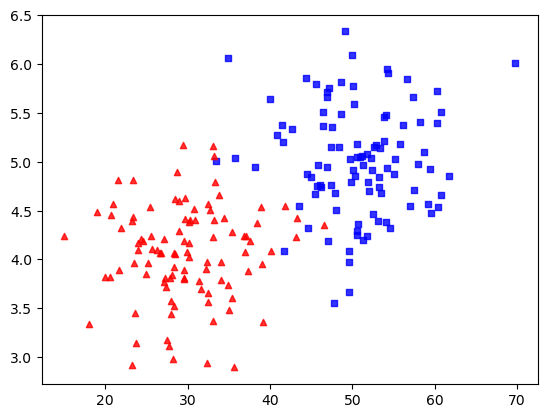

In [124]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [125]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [126]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [127]:
minmax_norm(x_val[:10])

array([0.        , 0.63643596, 1.        , 0.42995506, 0.15023196,
       0.4675437 , 0.58110917, 0.56056883, 0.05151049, 0.30371298])

In [142]:
from sklearn.preprocessing import MinMaxScaler
x_val=x_val.reshape(-1, 1)#1D->2D
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

[69.7707769]
[[0.54712049]
 [0.73087807]
 [0.83584958]
 [0.67126102]
 [0.59049683]
 [0.68211396]
 [0.71490361]
 [0.70897302]
 [0.56199307]
 [0.63481126]]
